In [1]:
import pandas as pd
import matplotlib
from datetime import datetime

In [113]:
df = pd.read_csv('cs_parking_statistics.csv', delimiter='|')

In [114]:
df = df.sort_values(by=['company_parking_lot_id', 'cms_created'])

In [115]:
df['cms_created_to'] = df['cms_created'].shift(-1)

In [116]:
df['date'] = pd.to_datetime(df['cms_created']).dt.date

In [117]:
df['date'] = pd.to_datetime(df['date'])

In [118]:
df['cms_created_to'] = pd.to_datetime(df['cms_created_to'])

In [119]:
df['cms_created'] = pd.to_datetime(df['cms_created'])

In [120]:
df = df[df['cms_created'] < df['cms_created_to']]

In [121]:
df['weekday'] = df['cms_created'].dt.dayofweek

In [122]:
df = df[df['weekday'] < 5]

In [123]:
df['time_taken'] = df['cms_created_to'] - df['cms_created']
df['time_taken'] = df['time_taken'].apply(lambda x: x.total_seconds()/(60*60))

In [124]:
df_occupied = df[df['status']=='occupied']

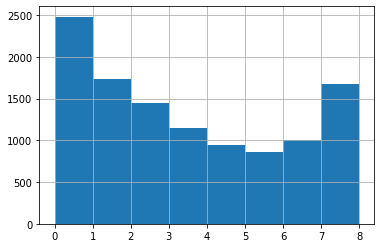

In [125]:
a = df[df['status']=='occupied']['time_taken'].hist(bins=[x for x in range(9)])

In [126]:
l = []

for company_parking_lot_id in df['company_parking_lot_id'].unique():
    for date in df['date'].unique():
        l.append(dict(date=date, company_parking_lot_id=company_parking_lot_id, status=open))

In [127]:
df.groupby(['date'])['company_parking_lot_id'].nunique().head(100)

date
2019-01-29     1
2019-01-31    54
2019-02-01    50
2019-02-04    88
2019-02-05    69
              ..
2019-06-13    62
2019-06-14    53
2019-06-17    67
2019-06-18    80
2019-06-19    54
Name: company_parking_lot_id, Length: 100, dtype: int64

In [138]:
a = df[df['status']=='occupied'].groupby(['company_parking_lot_id', 'date'])['time_taken'].sum().to_frame()

In [139]:
a

time_taken
company_parking_lot_id date                  
3                      2019-01-31    8.749444
                       2019-02-01    4.950833
                       2019-02-04    4.483889
                       2019-02-05    8.141111
                       2019-02-06    6.233333
...                                       ...
92                     2019-11-08    2.233333
                       2019-11-12    2.383333
                       2019-11-13    1.883333
                       2019-11-14    3.783056
                       2019-11-15    0.083056

[12156 rows x 1 columns]

In [145]:
sum(a.groupby(['company_parking_lot_id'])['time_taken'].mean())/len(a.groupby(['company_parking_lot_id'])['time_taken'].mean())

8.869514115296608

In [128]:
df_occupied = df[df['status']=='occupied']

In [129]:
a = len(df['company_parking_lot_id'].unique()) - df.groupby(['date'])['company_parking_lot_id'].nunique()

In [130]:
df.groupby(['date'])['company_parking_lot_id'].nunique()

date
2019-01-29     1
2019-01-31    54
2019-02-01    50
2019-02-04    88
2019-02-05    69
              ..
2019-11-11     3
2019-11-12    61
2019-11-13    45
2019-11-14    54
2019-11-15    19
Name: company_parking_lot_id, Length: 207, dtype: int64

In [131]:
x = df.groupby(['date'])['company_parking_lot_id'].nunique()

In [132]:
y = x.to_frame()
y = y[y['company_parking_lot_id'] > 30]

In [133]:
y['company_parking_lot_id'] = 90 - y['company_parking_lot_id']

In [134]:
import plotly.express as px
fig = px.histogram(y, x='company_parking_lot_id', nbins=10, title="Unused spots daily distribution")
fig.show()

In [153]:
import plotly.graph_objects as go

labels = ['Occupied','Idle']
values = [37, 63]
color = [ 'blue', 'navy']
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()